In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
employee = pd.read_csv('Employee.csv')

In [3]:
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
employee.shape

(4653, 9)

Unvariate visualization
histogram and density plots

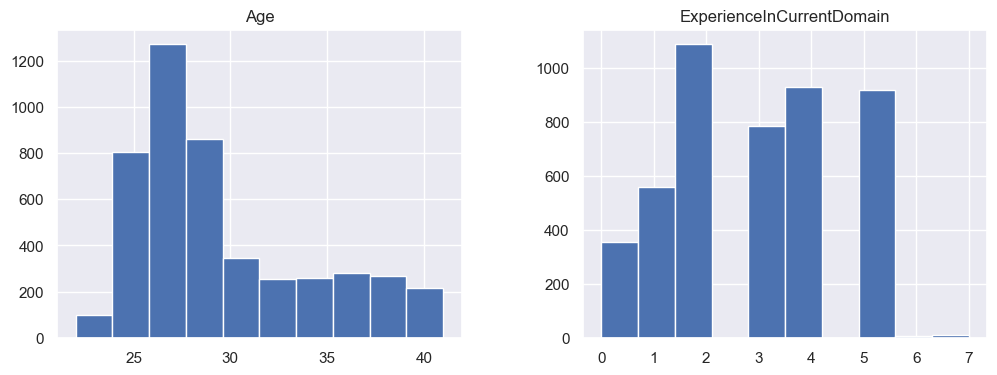

In [7]:
features = ['Age', 'ExperienceInCurrentDomain']
employee[features].hist(figsize = (12,4));

/var/folders/bx/cvl0nfpx75nbbbpb2kphl2p00000gn/T/ipykernel_30246/2779264307.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee['Age'])


<Axes: xlabel='Age', ylabel='Density'>

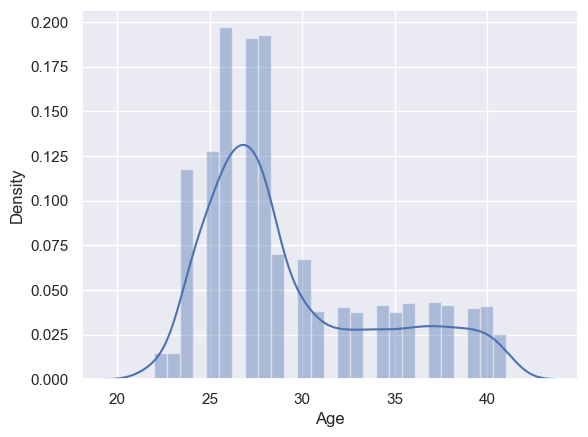

In [8]:
sns.distplot(employee['Age'])

Box plot

<Axes: xlabel='Age'>

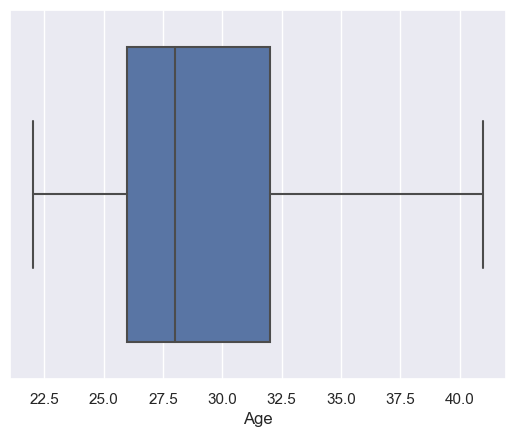

In [14]:
sns.boxplot(x = 'Age', data = employee)

In [15]:
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Voilin plot

AttributeError: module 'seaborn' has no attribute 'voilinplot'

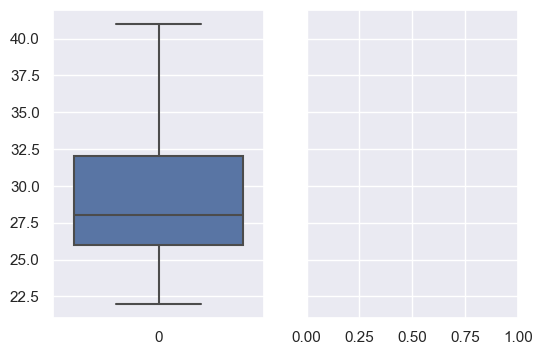

In [23]:
_, axes = plt.subplots(1,2, sharey = True, figsize = (6,4))
sns.boxplot(data = employee['Age'], ax = axes[0]);
sns.voilinplot(data = employee['PaymentTier'], ax = axes[1]);

In [24]:
employee['Age'].describe()

count    4653.000000
mean       29.393295
std         4.826087
min        22.000000
25%        26.000000
50%        28.000000
75%        32.000000
max        41.000000
Name: Age, dtype: float64

2. Categorical ad binary features

BAR PLOT

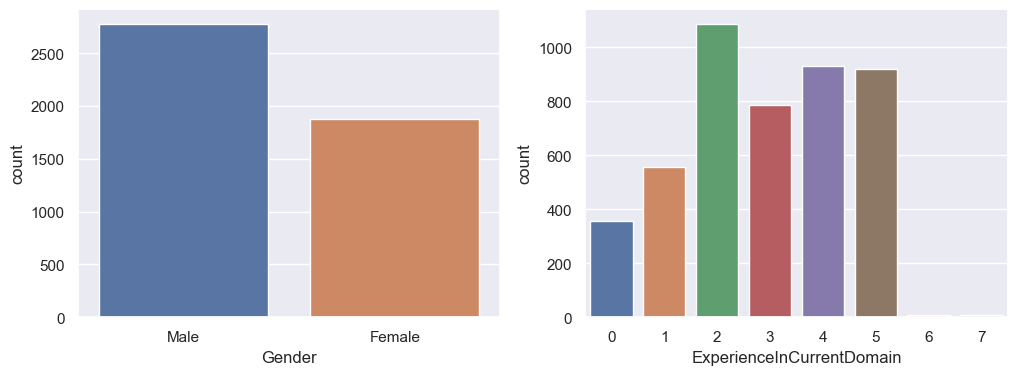

In [25]:
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
sns.countplot(x = 'Gender', data = employee, ax = axes[0]);
sns.countplot(x = 'ExperienceInCurrentDomain', data = employee, ax = axes[1]);

3. Multivariate visualization

Quantitative VS Quantitative /Correlation Matrix/

In [38]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 6))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=False, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

/var/folders/bx/cvl0nfpx75nbbbpb2kphl2p00000gn/T/ipykernel_30246/277614901.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


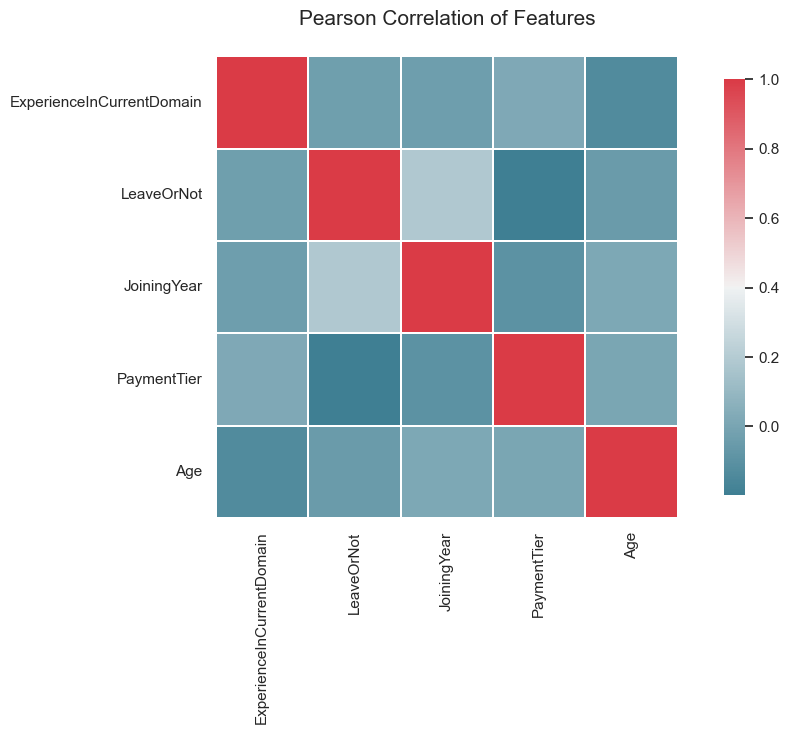

In [39]:
#Drop non-numerical variables
numerical = list(set(employee.columns) -
                set(['Education','City','Genter','EverBenched']))
correlation_heatmap(employee[numerical])

In [40]:
employee[numerical].corr()

/var/folders/bx/cvl0nfpx75nbbbpb2kphl2p00000gn/T/ipykernel_30246/4182737346.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  employee[numerical].corr()


,ExperienceInCurrentDomain,LeaveOrNot,JoiningYear,PaymentTier,Age
ExperienceInCurrentDomain,1.000000,-0.030504,-0.036525,0.018314,-0.134643
LeaveOrNot,-0.030504,1.000000,0.181705,-0.197638,-0.051126
JoiningYear,-0.036525,0.181705,1.000000,-0.096078,0.013165
PaymentTier,0.018314,-0.197638,-0.096078,1.000000,0.007631
Age,-0.134643,-0.051126,0.013165,0.007631,1.000000


Scatter Plot

In [56]:
telecom = pd.read_csv('telecom_churn.csv')

In [57]:
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


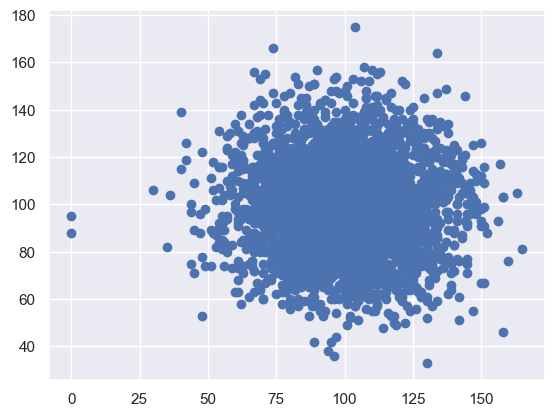

In [58]:
plt.scatter(telecom['Total day calls'], telecom['Total night calls'])

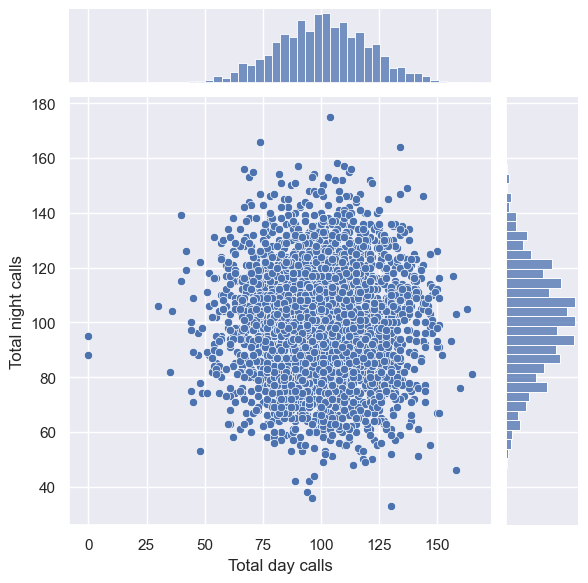

In [59]:
sns.jointplot(x = 'Total day calls', y = 'Total night calls', data = telecom, kind = 'scatter')

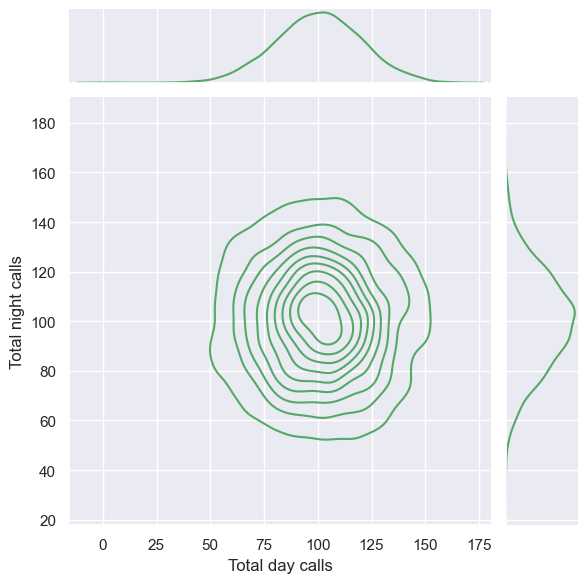

In [61]:
sns.jointplot(x = 'Total day calls', y = 'Total night calls', data = telecom, kind = 'kde', color = 'g')